In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Algorithm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv('./Titanic_assignment_data_3.csv')
df['Pclass']=df['Pclass'].astype(str)
new_df=df.dropna(axis=0, how='any').copy()
demo_mapping=new_df.copy()

# create dictionary for labels
mapping_Pclass={'3':3,'1':1,'2':2}
mapping_Sex={'male':0,'female':1}
mapping_Embarked={'S':0,'C':1,'Q':2}
mapping_Survived={'no':0,'yes':1}

# using map function
demo_mapping['Pclass']=demo_mapping['Pclass'].map(mapping_Pclass)
demo_mapping['Sex']=demo_mapping['Sex'].map(mapping_Sex)
demo_mapping['Embarked']=demo_mapping['Embarked'].map(mapping_Embarked)
demo_mapping['Survived']=demo_mapping['Survived'].map(mapping_Survived)
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived'],dtype=int).copy()
dummied_new_df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
1,28.0,0,0,26.55,1,0,0,0,1,0,0,1,0,1
2,28.0,1,1,14.40,0,0,1,1,0,0,0,1,1,0
3,39.0,0,0,13.00,0,1,0,0,1,0,0,1,1,0
4,22.0,0,0,8.05,0,0,1,0,1,0,0,1,1,0
5,34.0,0,0,13.00,0,1,0,0,1,0,0,1,0,1


In [3]:
x=dummied_new_df.drop(
    ['Survived_no','Survived_yes'],
    axis=1
).copy()
y=dummied_new_df['Survived_yes'].copy()


In [7]:
max_depth_range = range(1, 11)  # max_depth 從 1 到 10
max_leaf_nodes_range = range(2, 11)  # max_leaf_nodes 從 2 到 10

# 分割數據 (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=3
)

# 儲存各個 random_state 的結果
matrices = []  # 存放每個 random_state 的準確度矩陣

# 測試不同的 random_state
for random_state in [3, 30, 300]:
    x_train_tuning, x_valid, y_train_tuning, y_valid = train_test_split(
        x_train, y_train, test_size=0.2, random_state=random_state
    )

    # 建立一個空矩陣來存放準確度
    acc_matrix = np.zeros((len(max_depth_range), len(max_leaf_nodes_range)))

    for i, max_depth in enumerate(max_depth_range):
        for j, max_leaf_nodes in enumerate(max_leaf_nodes_range):
            # 初始化並訓練決策樹模型
            model_cart = DecisionTreeClassifier(
                criterion='gini',
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_leaf=1,
                random_state=4  # 固定隨機狀態以確保每次結果一致
            )
            model_cart.fit(x_train_tuning, y_train_tuning)  # 訓練模型

            # 預測並計算驗證準確度
            prediction = model_cart.predict(x_valid)
            valid_acc = accuracy_score(y_valid, prediction)
            acc_matrix[i, j] = valid_acc * 100  # 將準確度轉為百分比格式

    matrices.append(acc_matrix)

    # 印出當前 random_state 的準確度矩陣
    print(f"Random State {random_state} Accuracy Matrix:")
    print(np.round(acc_matrix, 2))
    print()

# 計算平均矩陣
average_matrix = np.mean(matrices, axis=0)

# 找出平均矩陣的最佳值與其索引
max_avg_acc = average_matrix.max()
max_avg_idx = np.unravel_index(average_matrix.argmax(), average_matrix.shape)
best_avg_depth = max_depth_range[max_avg_idx[0]]
best_avg_leaf_nodes = max_leaf_nodes_range[max_avg_idx[1]]

# 印出平均矩陣與最佳參數
print("Averaged Accuracy Matrix:")
print(np.round(average_matrix, 2))
print(f"\nBest Parameters Across All Random States:")
print(f"  Average Best max_depth: {best_avg_depth}")
print(f"  Average Best max_leaf_nodes: {best_avg_leaf_nodes}")
print(f"  Average Best Accuracy: {round(max_avg_acc, 2)}%")

Random State 3 Accuracy Matrix:
[[75.   75.   75.   75.   75.   75.   75.   75.   75.  ]
 [75.   74.22 72.66 72.66 72.66 72.66 72.66 72.66 72.66]
 [75.   74.22 72.66 75.78 75.78 76.56 76.56 76.56 76.56]
 [75.   74.22 72.66 75.78 75.78 76.56 76.56 78.12 78.12]
 [75.   74.22 72.66 75.78 75.78 76.56 76.56 78.12 78.12]
 [75.   74.22 72.66 75.78 75.78 76.56 76.56 78.12 78.12]
 [75.   74.22 72.66 75.78 75.78 76.56 76.56 78.12 78.12]
 [75.   74.22 72.66 75.78 75.78 76.56 76.56 78.12 78.12]
 [75.   74.22 72.66 75.78 75.78 76.56 76.56 78.12 78.12]
 [75.   74.22 72.66 75.78 75.78 76.56 76.56 78.12 78.12]]

Random State 30 Accuracy Matrix:
[[66.41 66.41 66.41 66.41 66.41 66.41 66.41 66.41 66.41]
 [66.41 66.41 66.41 66.41 66.41 66.41 66.41 66.41 66.41]
 [66.41 66.41 67.97 67.97 69.53 69.53 67.97 67.97 67.97]
 [66.41 66.41 67.97 67.97 69.53 69.53 69.53 67.97 67.97]
 [66.41 66.41 67.97 67.97 69.53 69.53 69.53 67.97 67.97]
 [66.41 66.41 67.97 67.97 69.53 69.53 69.53 67.97 67.97]
 [66.41 66.41 67.97 6

Testing ACC: 73.58
Testing f1s: 63.79
Testing pre: 66.07
Testing sen: 61.67
Testing spe: 80.81


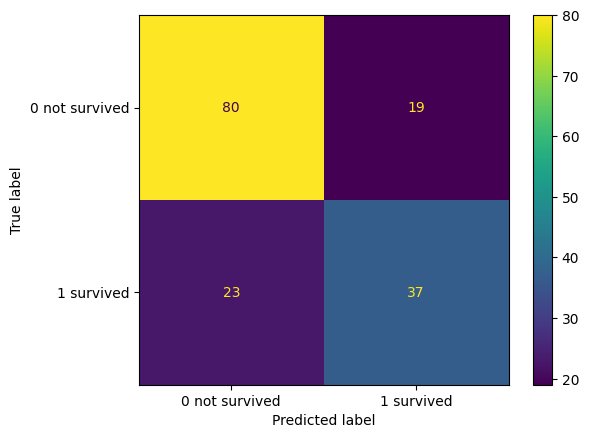

In [5]:
# 5.3 Evaluate with testing data set
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=3)

# 建立決策數
HHmodel=DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    max_leaf_nodes=7,
    min_samples_leaf=1,
    random_state=4
)
HHmodel.fit(x_train,y_train)
final_model_testing_prediction=HHmodel.predict(x_test)
final_model_testing_acc=accuracy_score(y_test,final_model_testing_prediction)
final_model_testing_f1s=f1_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_pre=precision_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_sen=recall_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_spe=recall_score(y_test,final_model_testing_prediction,pos_label=0)
final_model_testing_cm=confusion_matrix(y_test,final_model_testing_prediction)

#print result
print('Testing ACC:',round(final_model_testing_acc*100,2))
print('Testing f1s:',round(final_model_testing_f1s*100,2))
print('Testing pre:',round(final_model_testing_pre*100,2))
print('Testing sen:',round(final_model_testing_sen*100,2))
print('Testing spe:',round(final_model_testing_spe*100,2))
ConfusionMatrixDisplay(final_model_testing_cm,display_labels=["0 not survived","1 survived"]).plot()

[Text(0.4444444444444444, 0.9166666666666666, 'Sex_female <= 0.5\ngini = 0.482\nsamples = 508\nvalue = [302, 206]\nclass = not survived'),
 Text(0.2222222222222222, 0.75, 'Fare <= 14.823\ngini = 0.331\nsamples = 296\nvalue = [234, 62]\nclass = not survived'),
 Text(0.3333333333333333, 0.8333333333333333, 'True  '),
 Text(0.1111111111111111, 0.5833333333333334, 'gini = 0.206\nsamples = 163\nvalue = [144, 19]\nclass = not survived'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.438\nsamples = 133\nvalue = [90, 43]\nclass = not survived'),
 Text(0.6666666666666666, 0.75, 'Pclass_3 <= 0.5\ngini = 0.436\nsamples = 212\nvalue = [68, 144]\nclass = survived'),
 Text(0.5555555555555556, 0.8333333333333333, '  False'),
 Text(0.5555555555555556, 0.5833333333333334, 'gini = 0.312\nsamples = 119\nvalue = [23, 96]\nclass = survived'),
 Text(0.7777777777777778, 0.5833333333333334, 'Age <= 37.5\ngini = 0.499\nsamples = 93\nvalue = [45, 48]\nclass = survived'),
 Text(0.6666666666666666, 0.41

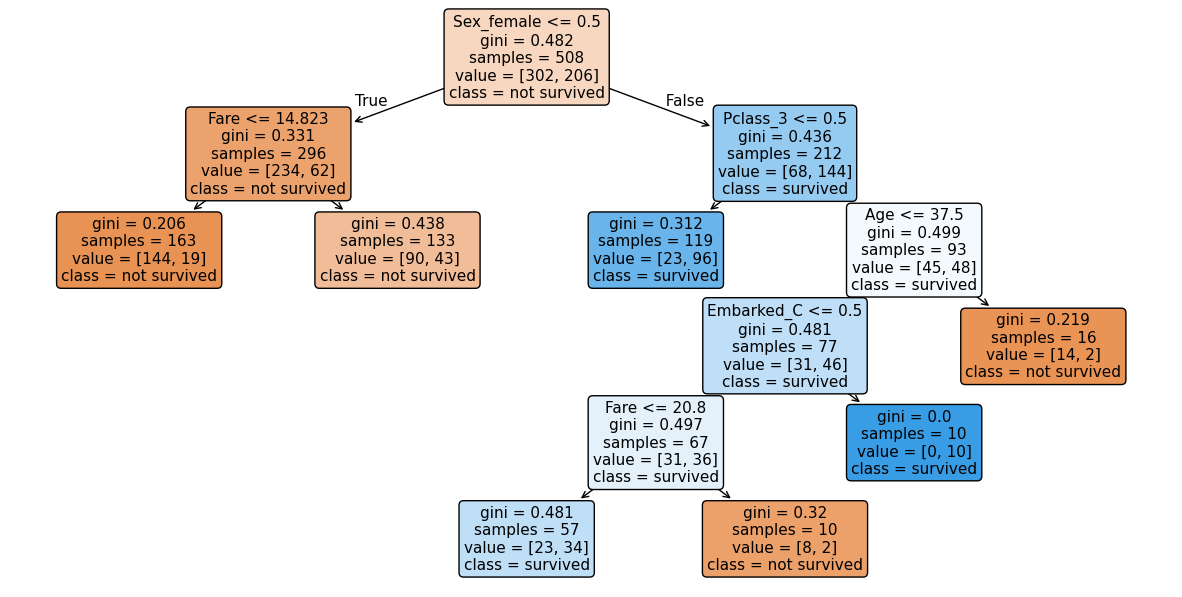

In [6]:
model_cart = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    max_leaf_nodes=7,
    min_samples_leaf=1,
    random_state=4  # 固定隨機狀態以確保每次結果一致
)
model_cart.fit(x_train_tuning, y_train_tuning)  # 訓練模型

plt.figure(figsize=(15,7.5))
tree.plot_tree(model_cart,filled=True,rounded=True,class_names=["not survived","survived"],feature_names=x.columns)